### 1. Сравните метрики hit_rate@k, precision@k. Какую метрику использовать предпочтительно и почему? Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?

hit_rate@k отличается precision@k как классификация от регрессии. В первом случае мы получаем четкий ответ, была ли рекоммендация удачной (привела ли к желаемому действию клиента), во втором - получаем некоторую количественную оценку результата. В большинстве случаев, precision дает более объективную картину. Если метрика равна нулю, это эквивалентно hit_rate=0, при любом отличном результате, мы можем его оценить количественно: Был ли куплен один товар, или несколько.
Использовать hit_rate (hit_rate@k) имеет смысл в тех случаях, когда клиент склонен "выбирать один товар", а не "затариваться многими". Тривиальный пример - магазин "одного товара" (мобильных телефонов, складных ножей, сноубордов, велосипедов). Те площадки, откуда обычно уходят с максимум одной покупкой. "Потребитель" - данные собранные с действий посетителя, товар - товар.
Менее тривиальный пример - площадка знакомств. И клиент и товар - пользователи площадки. В данном случае некоторая неупорядоченность hit_rate играет на руку - пользователю-мальчику интереснее видеть фоточки разных девочек, важнее что бы хотябы одна нравилась, чем чтобы были одни и те же персонажи, да еще отсортированные "по сортам"
Третий пример - рекоммендательный сервис "какой фильм посмотреть с друзьями" (например, для ВК). Клиент - группа аккаунтов ВК, выбирающая фильм + данные о каждом, накопленные сервисом, товар - фильмы. Очевидно, чтов итоге будет выбран один вариант, и не суть важно на первом он месте был, или десятом.

### 2. В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в знаменателе присутствует логарифм.

Проиллюстрирую график слагаемых в 𝑖𝑑𝑒𝑎𝑙𝐷𝐶𝐺@15, "вклада" каждого предсказанного значения в общую метрику, без нормирования. Заодно, подставлю в знаменатель линейную зависимость и корень из порядкового номера, для сравнения.

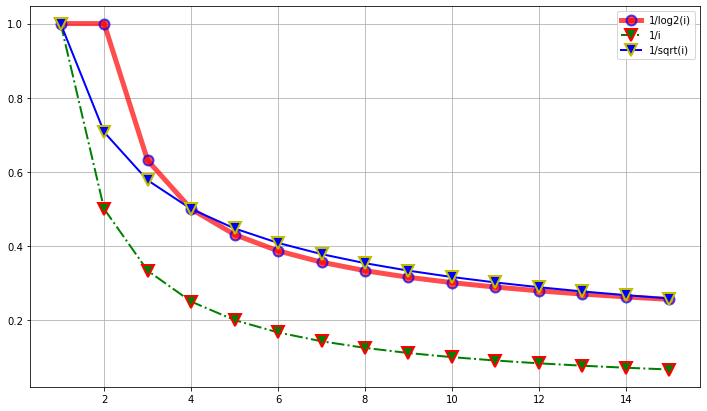

In [48]:
import math
from matplotlib import pyplot as plt
%matplotlib inline

x = [i for i in range(1,16)]
y1 = [1]

for i in x[1:]:
    y1.append(1/math.log2(i))
    
    
y2, y3 = [], []
for i in x:
    y2.append(1/i)
    y3.append(1/math.sqrt(i))

    
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="1/log2(i)", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="1/i", mec='r', lw=2, mew=2, ms=12)
plt.plot(x, y3, 'v-b', label="1/sqrt(i)", mec='y', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True);


Такие графики наглядно показывают "вклад" в общую метрику каждого из 15 результатов. Видно, что при делении на порядковый номер, второе предсказание имеет вдвое меньшую "ценность" чем первое, и вообще с ростом количества, важность быстро стремится к нулю. Графики, где в знаменателе корень и логарифм на позициях больше 4-го номера ведут себя в целом, сходно, и важность признаков убывает значительно медленнее.

Самое же интересное, что согласно формуле 
$ideal DCG@5 = \frac{1}{5}*(1 / 1 + 1 / log(2) + 1 / log(3) + 1 / log(4) + 1 / log(5))$  
$log_2(2) = 1$
И получается, что "мощность" первых двух пунктов выдачи равна, и только потом начинает убывать. Довольно интересная и неожиданная закономерность.
В принципе, такое поведение можно "захардкодить" для любой функции в знаменателе. Например, для рекоммендаций в карусели "с этим товаром так же покупают", где на экран выводится 4 карточки, а для просмотра остальных нужно прокручивать, можно сделать так:

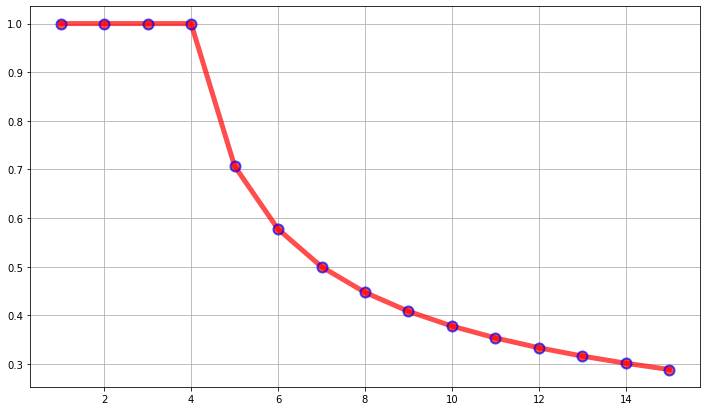

In [49]:
y = []
n = 4
for i in x:
    if i < n:
        y.append(1)
    else:
        y.append(1/math.sqrt(i-n+1))

    
plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o-r', alpha=0.7, label="1/log2(i)", lw=5, mec='b', mew=2, ms=10)

plt.grid(True);

То есть,функция в знаменателе не обязательно должна быть математической, важнее, чтобы она соответствовала бизнес-логике. 

### 3. Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики и чем являются интеракции, чтобы она могла быть использована).

WTA (winner takes all) – эта метрика равна 1, если топ-рекомендация (с самым большим предсказанным рейтингом) из просмотренных пользователем получила положительную оценку, и 0 в противном случае. Может оказаться весьма полезна, если у нас единственная попытка "завоевать" клиента. Например, коммерческое предложение для обзвона клиентов. Они не будут слушать ничего, если первые предложения не "зацепят".


Каскадные метрики. Учитывают релевантность более ранговых предсказаний при оценке следующих. Например, выбирая статьи для этого домашнего задания, я в какой-то момент "насытился", но это не означает что ниже стоящие по выдаче статьи были менее полезны.


Пример такой метрики Expected reciprocal rank (ERR, ERR@k) - рассчитывается как сумма вероятностей что пользователь удовлетворится i-тым объектом, поделенная на k 

pfound - сумма вероятностей того, что пользователь увидит рекоммендацию на то, что она окажется верной. Поскольку учитывает пользовательское поведение, уместна когда юзер активно взаимодействует с результатами выдачи. Ищет нужный документ в списке, свайпает фоточки и т.д.

Top@k - доля хороших предсказаний из первых k, по сути, второе название precision@k, но более понятно отражает суть (с ТОПами чаще сталкиваемся). Применима, когда количество рекоммендаций, выводимых пользователю заранее известно, и он их воспринимает "блоком", то есть порядок не суть важен.


В принципе, метрики можно "затачивать" под задачу, в примере с каруселью выше, на первых позициях метрика ведет себя как precision@k, но и следующие товары, вплоть до 15-го учитывает с убывающей мощностью, отрабатывая и ситуацию когда пользователь пассивно просматривает страницу, и когда прокручивает карусель.



### 4. Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, RR@8, ERR@8

In [14]:
from sklearn.metrics import ndcg_score
import numpy as np
from sklearn import metrics

In [19]:
boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

In [26]:
# pr@8 - точность на K элементах

def pr_k(recommended_list, bought_list, k=8): # точность на K элементах
    
    bought_list = np.array(bought_list) #преобразуем списки в массив
    recommended_list = np.array(recommended_list)[:k] #преобразуем в массив и возьмём первые k рекомендованных товаров
    
    flags = np.isin(bought_list, recommended_list) # выбираем купленные товары из рекомендованных
  
    precision = flags.sum() / len(recommended_list) # вычисляеи процент купленных товаров из первых k рекомендованных
    
    
    return precision

# rec@8  полнота на K элементах


def rec_k(recommended_list, bought_list, k=8):
    bought_list = np.array(bought_list) # преобразуем список в массив
    recommended_list = np.array(recommended_list)[:k] #преобразуем в массив и возьмём первые k рекомендованных товаров
    
    flags = np.isin(bought_list, recommended_list) #выбираем купленные товары из рекомендованных
    
    recall = flags.sum() / len(bought_list) # вычисляем rec@k
    
    return recall
  
# AP@8 Average precision at K


def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(1, k+1): 
        if flags[i] == True:
            p_k = pr_k(recommended_list, bought_list, k=i)
            sum_ += p_k
            
    result = sum_ / sum(flags)
    
    return result

# NDCG@8 Normalized discounted cumulative gain

def NDCG_k(recommended_list, bought_list, k=8):
  
 
    recommended_list = np.array(recommended_list)
  
  
    kDCG_k=bought_list.count(recommended_list[0]); # вычисляем начальное условие 
  
    t=1

  
    for i in recommended_list[1:k]: # вычисляем количество покупок из рекомендованных (с учетом десятичных логарифмов)
        t+=1
        n = bought_list.count(i)
        kDCG_k+=n/np.log10(t)

    t=1
    kiDCG_k=1

    for i in range(1,k):  # вычичляем идеальное состояние
        t+=1
        kiDCG_k=kiDCG_k+1/np.log10(t)


    return kDCG_k/kiDCG_k # возвращаем искомую метрику NDCG




# RR@8 Количество купленных товаров / Общее число предложенных из k предложенных

def RR_k(recommended_list, bought_list, k=8):
    n=0
    for i in recommended_list[:k]: # вычисляем количество покупок из рекомендованных (с учетом десятичных логарифмов)
        n+=bought_list.count(i)

    return n/k


# ERR@8


def expected_reciprocal_rank(recommended_list, bought_list, k=8):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list[:k])
    
    item_relevant = [(recommended_list[i] in bought_list) for i in range(recommended_list.shape[0])]
   
    rank_item_relevant = [i+1 for i in range(len(item_relevant)) if item_relevant[i]]    
    
    max_r_true = max(rank_item_relevant)
 
    
    p_k = np.zeros(k)    
    for i in range(k):
        p_k[i] = (2**item_relevant[i] - 1) / (2**1 - 1)   
   
    
    P_k = np.zeros(k)    
    P_k[0] = p_k[0]
    for i in range(1, k):
        P_k[i] = p_k[i]
        for j in range(1, i):
            P_k[i] *= (1 - p_k[j]) 
        P_k[i] = P_k[i] / k
   
        
    return sum(P_k)

In [29]:
# list=[recommended, boughted, 8]

print("PR@8 " + str(pr_k(recommended, boughted, 8)))

print("REC@8  "+ str(rec_k(recommended, boughted, 8)))

print("AP@8  " + str(ap_k(recommended, boughted, 8)))

print("NDCG@8  " + str(NDCG_k(recommended, boughted, 8)))

print("RR@8  " + str(RR_k(recommended, boughted, 8)))

print("ERR@8 " + str(expected_reciprocal_rank(recommended, boughted, 8)))

PR@8 0.5
REC@8  0.6666666666666666
AP@8  0.32
NDCG@8  0.6215894130709897
RR@8  0.5
ERR@8 0.125


При выполнении домашки вознакла пара вопросов:
1) Как "измерять" результативность предсказаний, если пользователь купил предложенный товар, но не сиюминутно, а "взяв паузу", и вернулся завтра, через месяц, а то и вовсе пошел гуглить и в итоге купил, но у конкурентов, ведь это вопрос к бизнесу, а "страдать" будет качество предсказаний.
2) Есть сервисы, предлагающие за платы "VIP-условия": сайты знакомств, доски объявлений. Как подобные товары должны обрабатываться рекоммендательной системой? 